# Breast Cancer Data Analysis

## Imports

In [8]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Loading data

In [2]:
data = pd.read_csv("../data/cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569,NaN,NaN,NaN,3.03718e+07,1.25021e+08,8670,869218,906024,8.81313e+06,9.11321e+08
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569,NaN,NaN,NaN,14.1273,3.52405,6.981,11.7,13.37,15.78,28.11
texture_mean,569,NaN,NaN,NaN,19.2896,4.30104,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569,NaN,NaN,NaN,91.969,24.299,43.79,75.17,86.24,104.1,188.5
area_mean,569,NaN,NaN,NaN,654.889,351.914,143.5,420.3,551.1,782.7,2501
smoothness_mean,569,NaN,NaN,NaN,0.0963603,0.0140641,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569,NaN,NaN,NaN,0.104341,0.0528128,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569,NaN,NaN,NaN,0.0887993,0.0797198,0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569,NaN,NaN,NaN,0.0489191,0.0388028,0,0.02031,0.0335,0.074,0.2012


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

## Exploratory Data Analysis

### Nullity Analysis

In [7]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

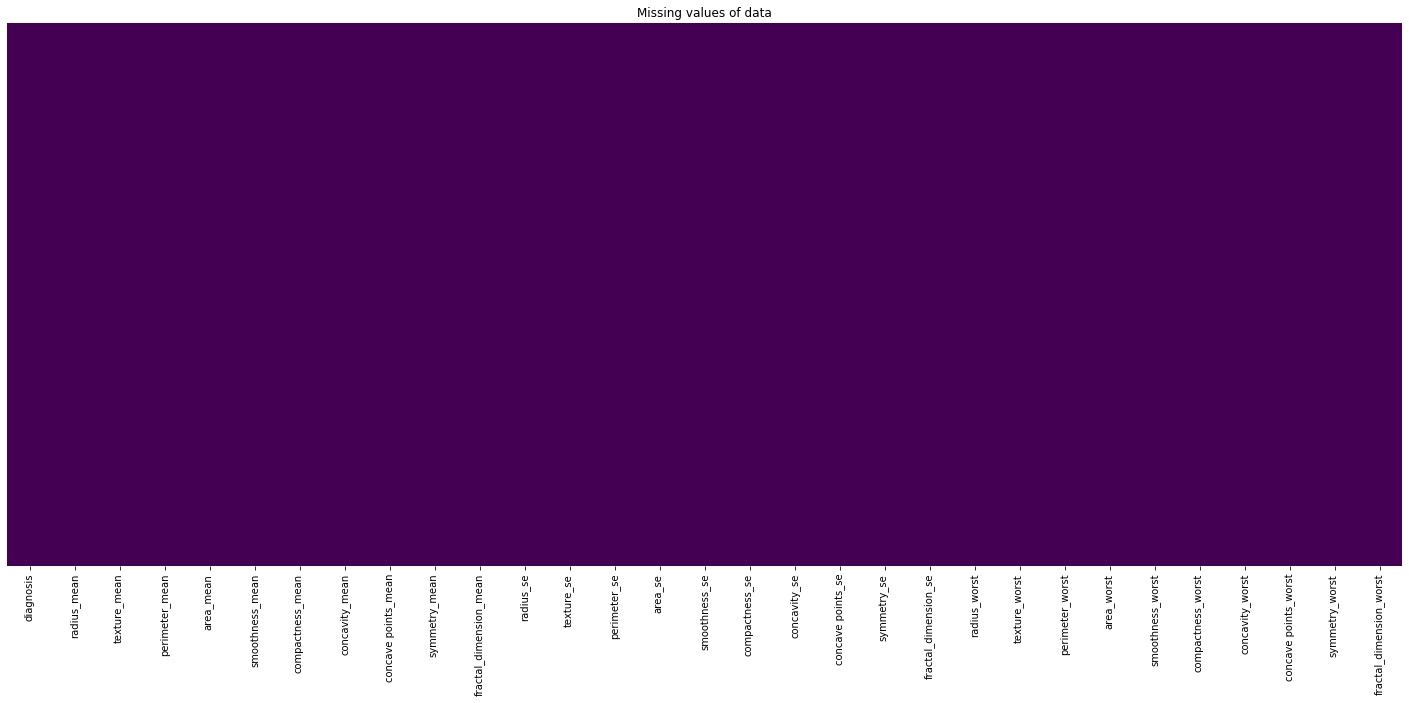

In [9]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False);
plt.title("Missing values of data");

### Univariate Analysis

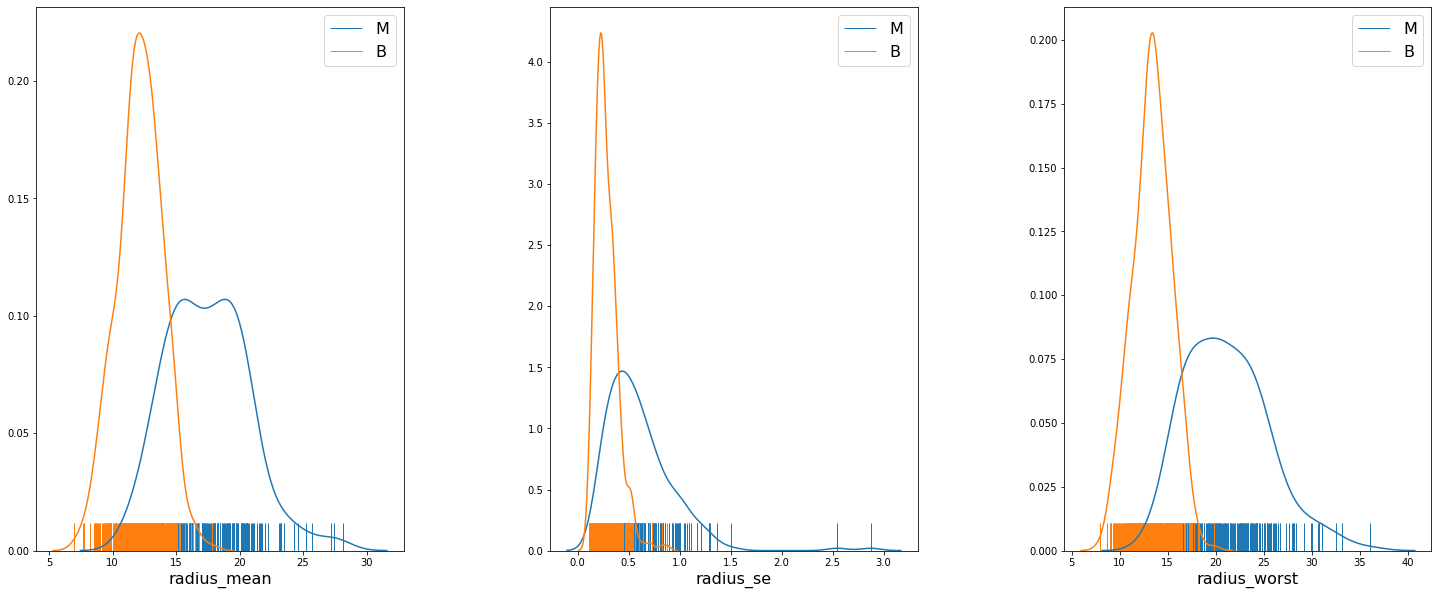

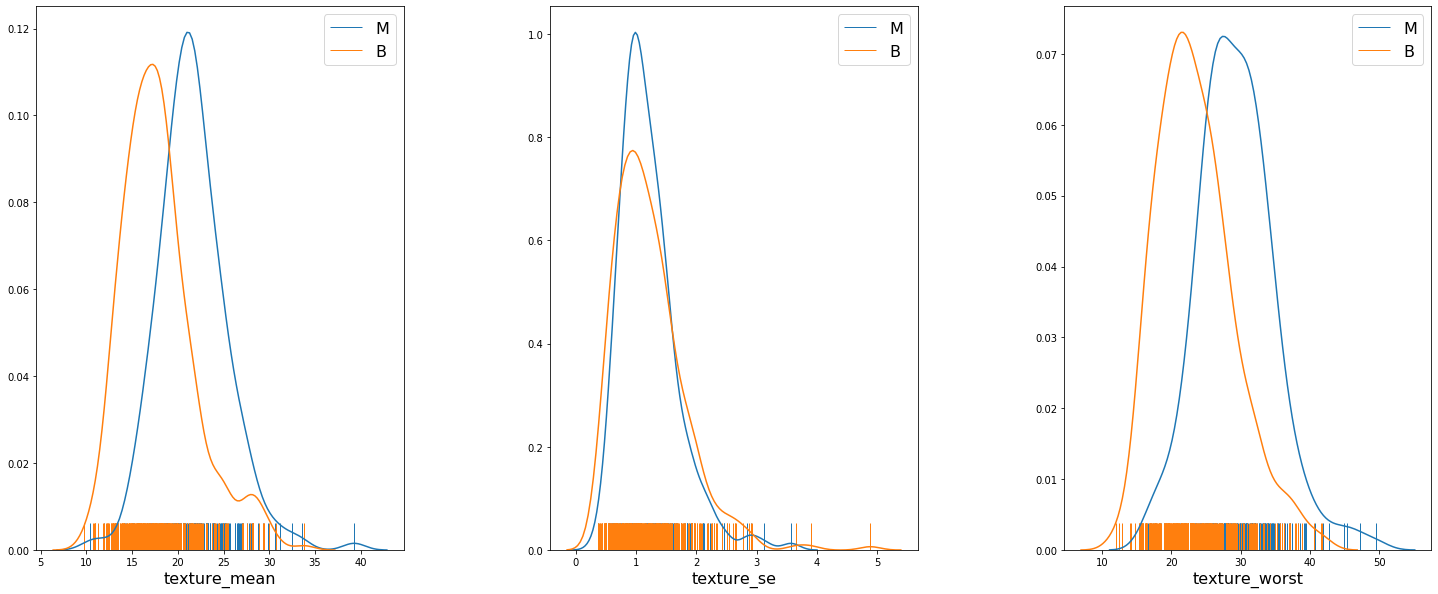

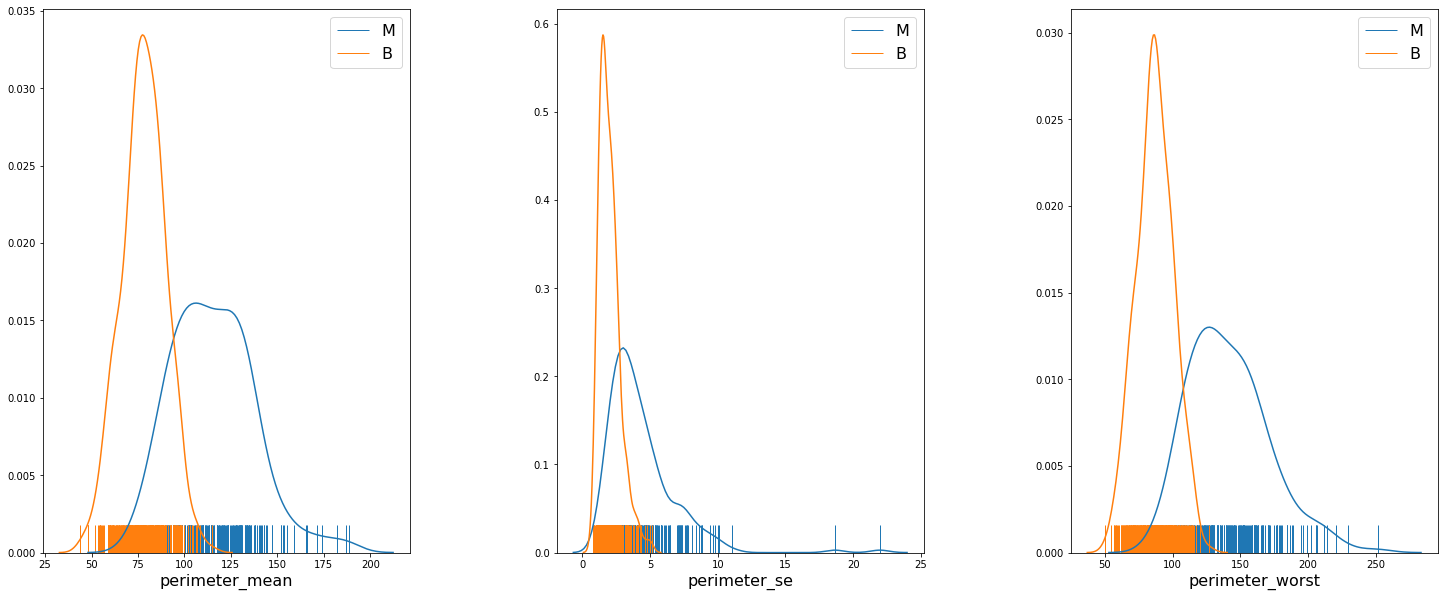

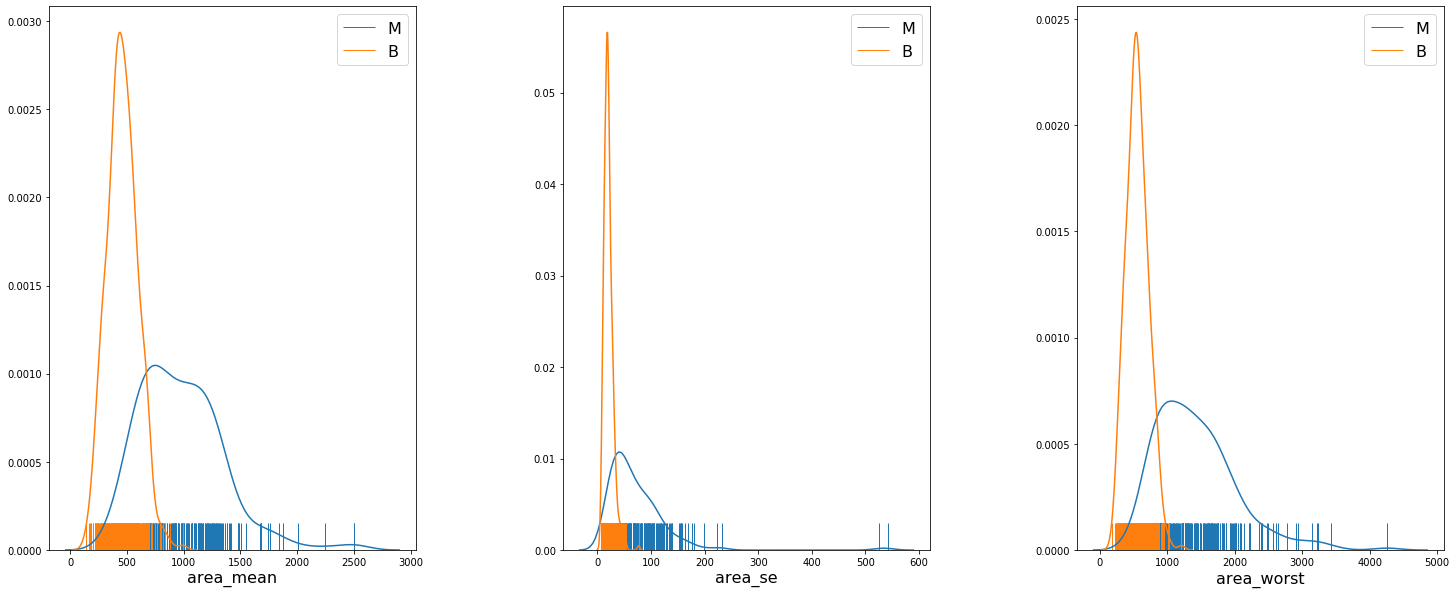

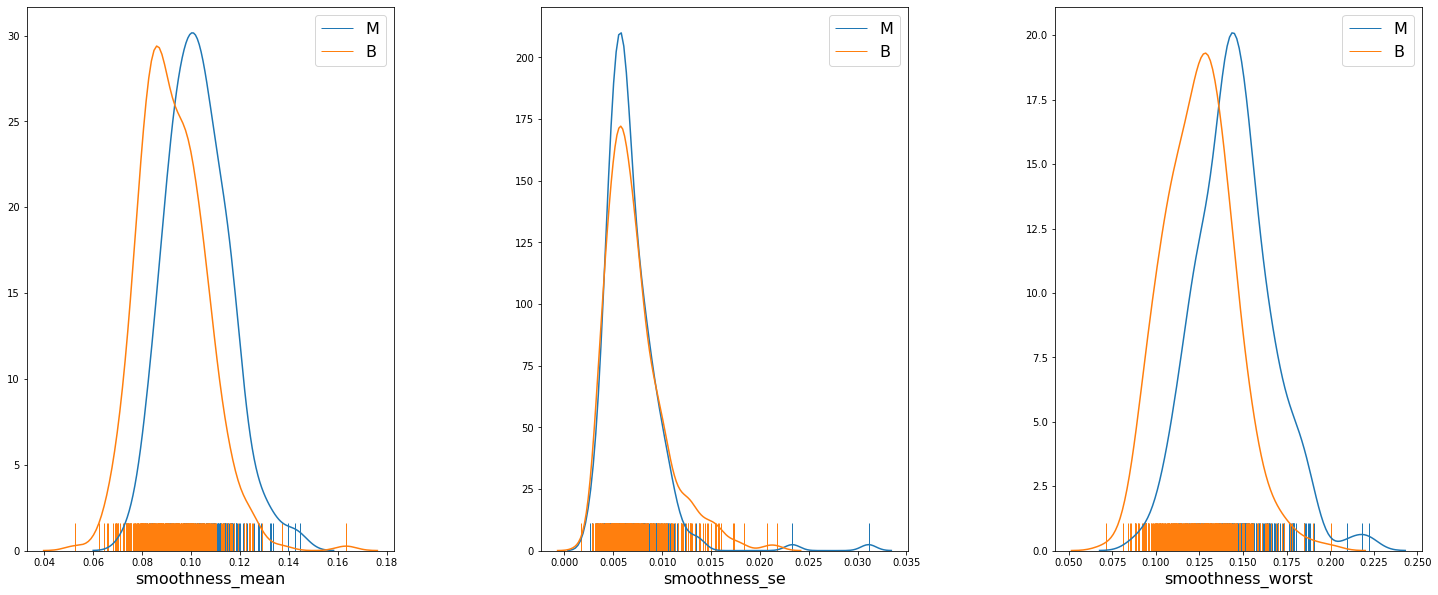

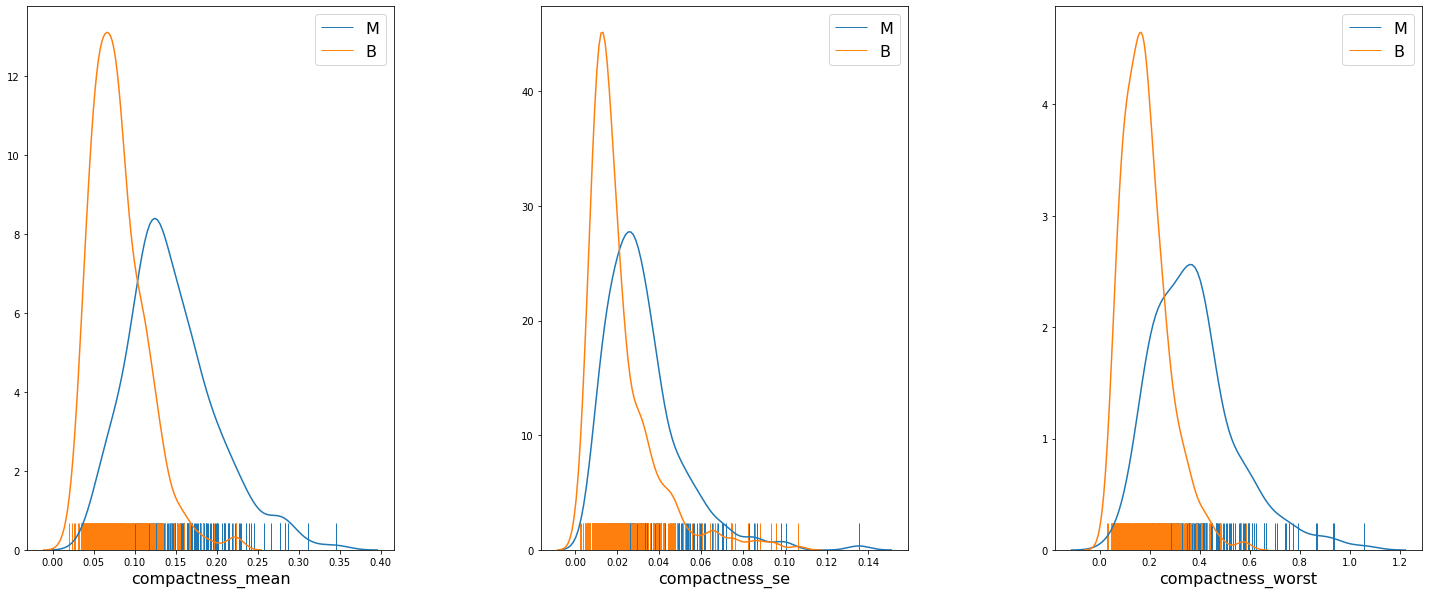

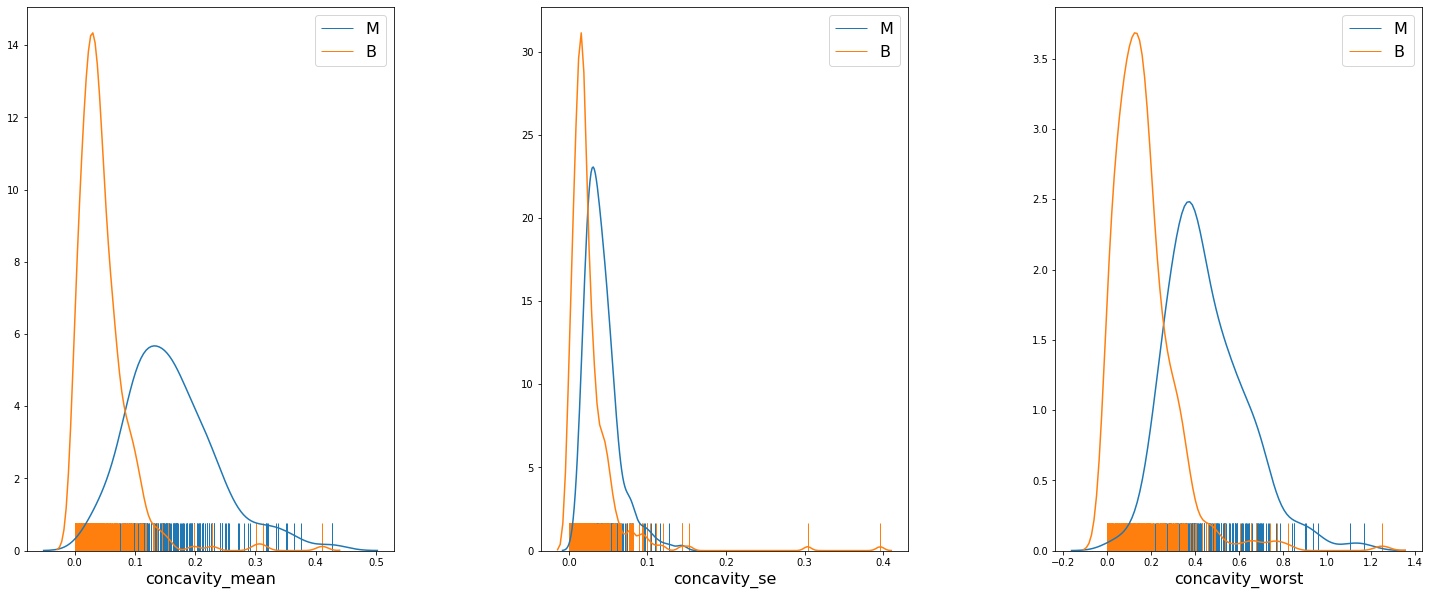

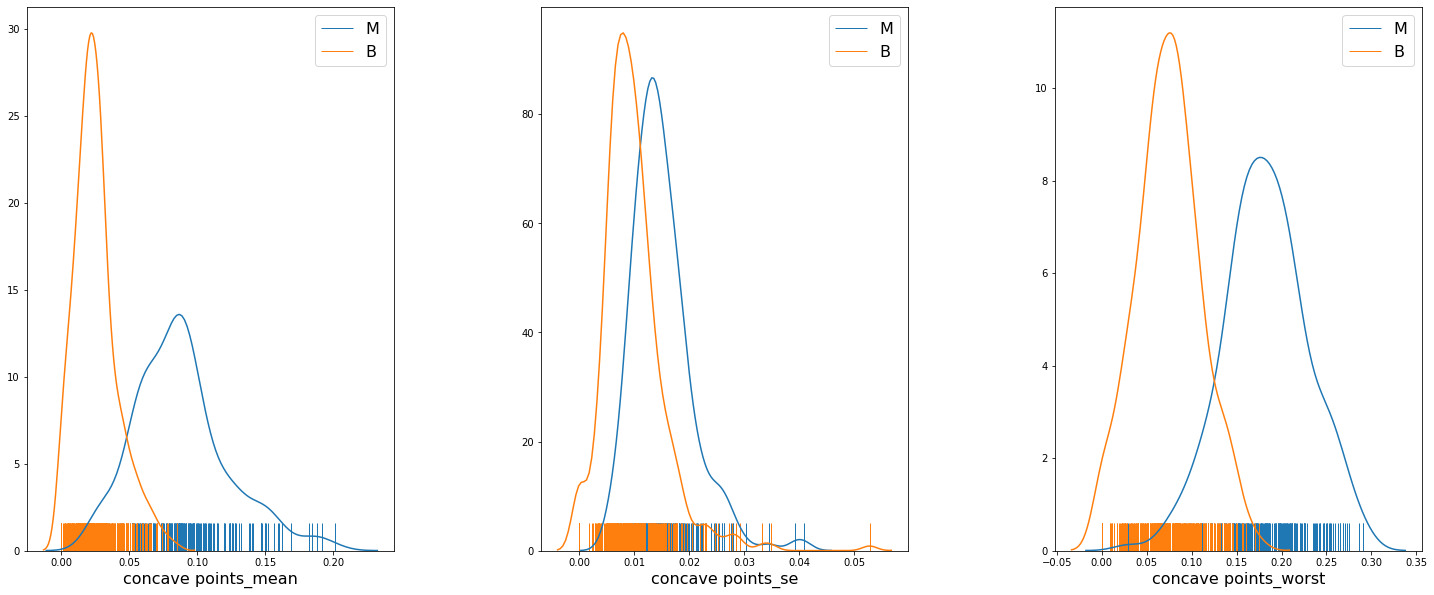

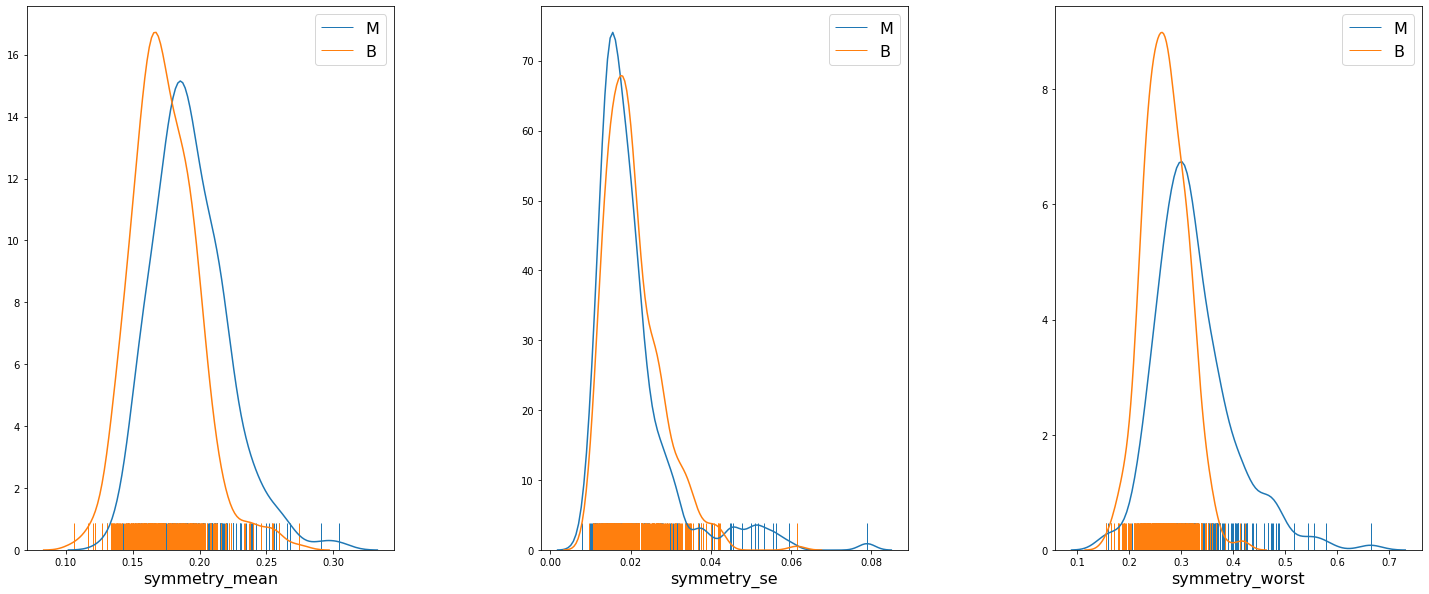

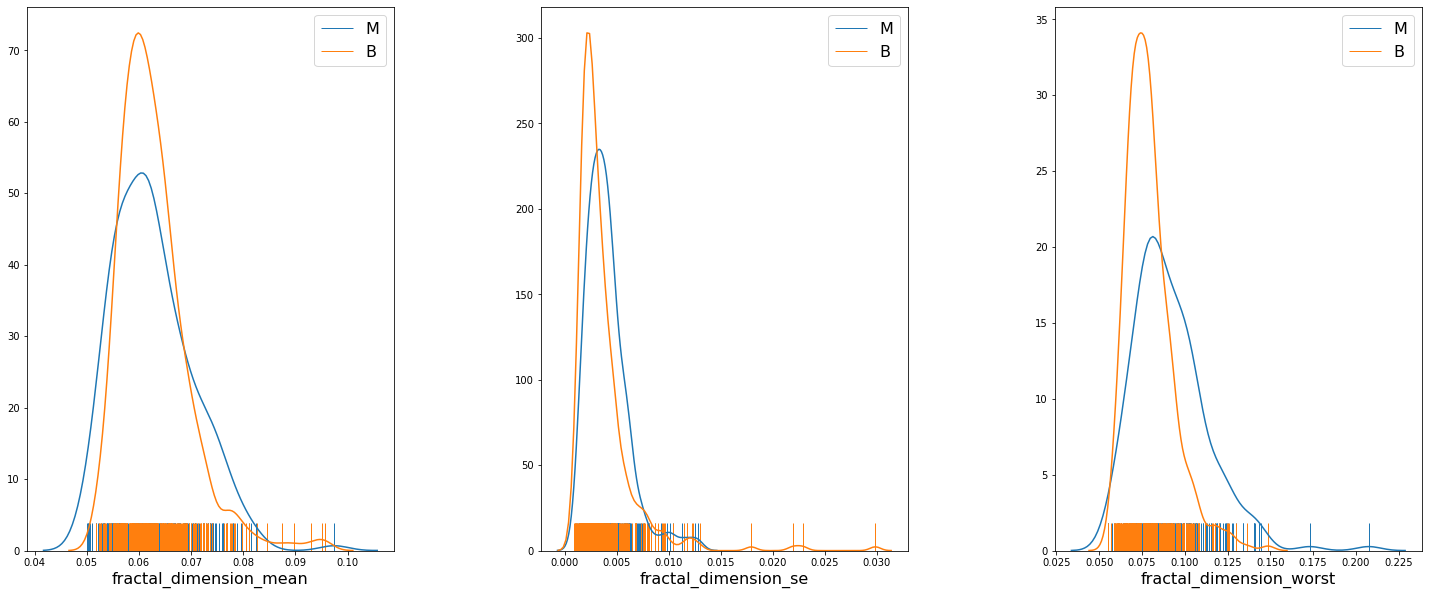

In [10]:
for i in range(1,11):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, 3, 1)
    sns.distplot(data.loc[data["diagnosis"]=="M", :][data.columns[i]], hist=False, rug=True);
    sns.distplot(data.loc[data["diagnosis"]=="B", :][data.columns[i]], hist=False, rug=True);
    plt.legend(["M", "B"]);
    ax = fig.add_subplot(1, 3, 2)
    sns.distplot(data.loc[data["diagnosis"]=="M", :][data.columns[i+10]], hist=False, rug=True);
    sns.distplot(data.loc[data["diagnosis"]=="B", :][data.columns[i+10]], hist=False, rug=True);
    plt.legend(["M", "B"]);
    ax = fig.add_subplot(1, 3, 3)
    sns.distplot(data.loc[data["diagnosis"]=="M", :][data.columns[i+20]], hist=False, rug=True);
    sns.distplot(data.loc[data["diagnosis"]=="B", :][data.columns[i+20]], hist=False, rug=True);
    plt.legend(["M", "B"]);

There is no perfect separation between any of the features; we do have fairly good separations for `concave points_worst`, `concavity_worst`, `perimeter_worst`, `area_mean`, `perimeter_mean`. We do have as well tight superposition for some of the values, like `symmetry_se`, `smoothness_se`.

### Correlation Matrix

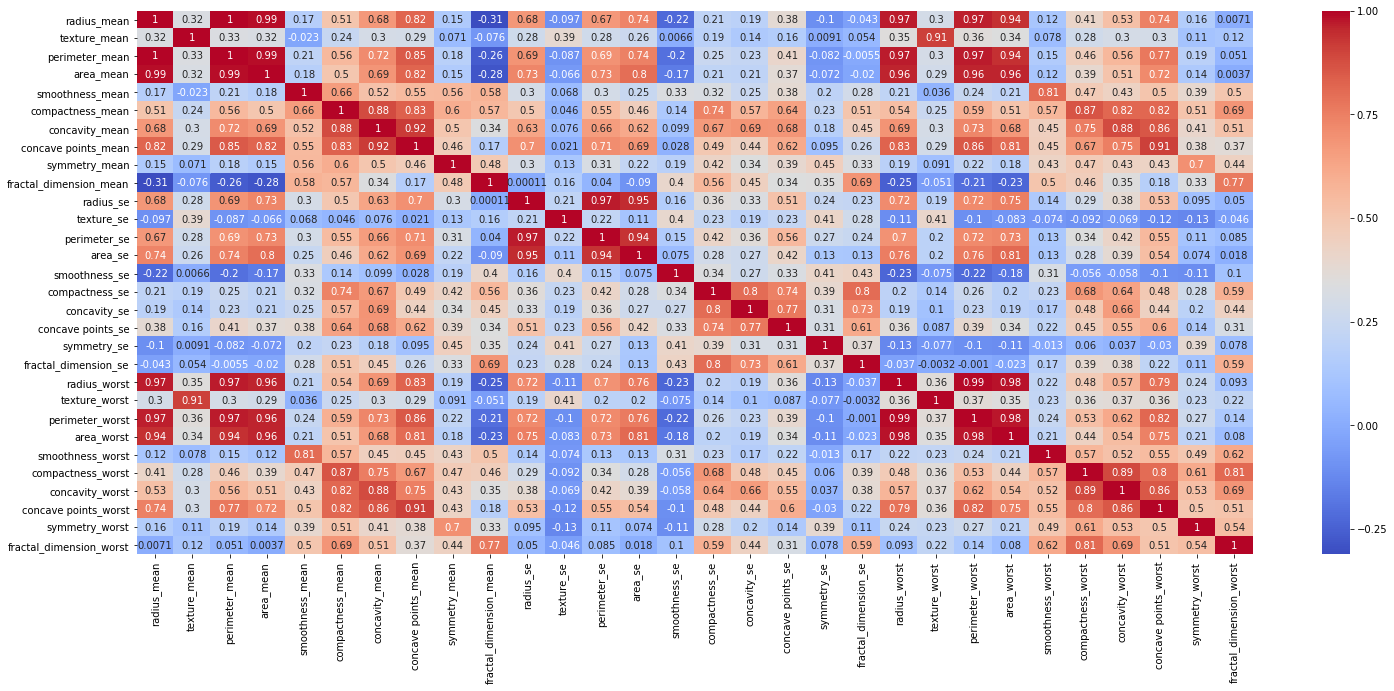

In [11]:
sns.heatmap(data.corr(), cmap="coolwarm", annot=True);

The highest corelations are between:
- `perimeter_mean` and `radius_worst`
- `area_worst` and `radius_worst`
- `perimeter_worst` and `radius_worst`, `perimeter_mean`, `area_worst`, `area_mean`, `radius_mean`
- `texture_mean` and `texture_worst`

### Bivariate Analysis

#### Highly correlated pairs

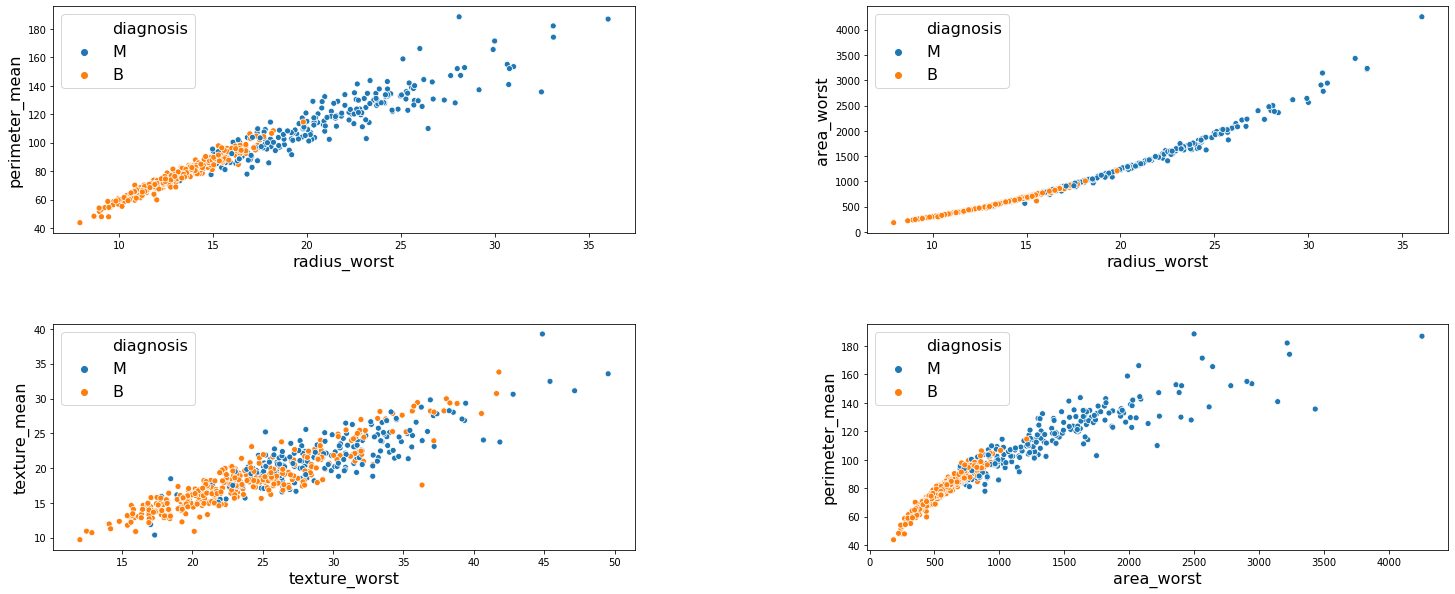

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data["radius_worst"], data["perimeter_mean"], hue=data["diagnosis"]);
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(data["radius_worst"], data["area_worst"], hue=data["diagnosis"]);
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(data["texture_worst"], data["texture_mean"], hue=data["diagnosis"]);
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(data["area_worst"], data["perimeter_mean"], hue=data["diagnosis"]);

We see that some of the correlated pairs show good separation between data with diagnosis `B` and data with diagnosis `M`. 

#### Inversely correlated pairs

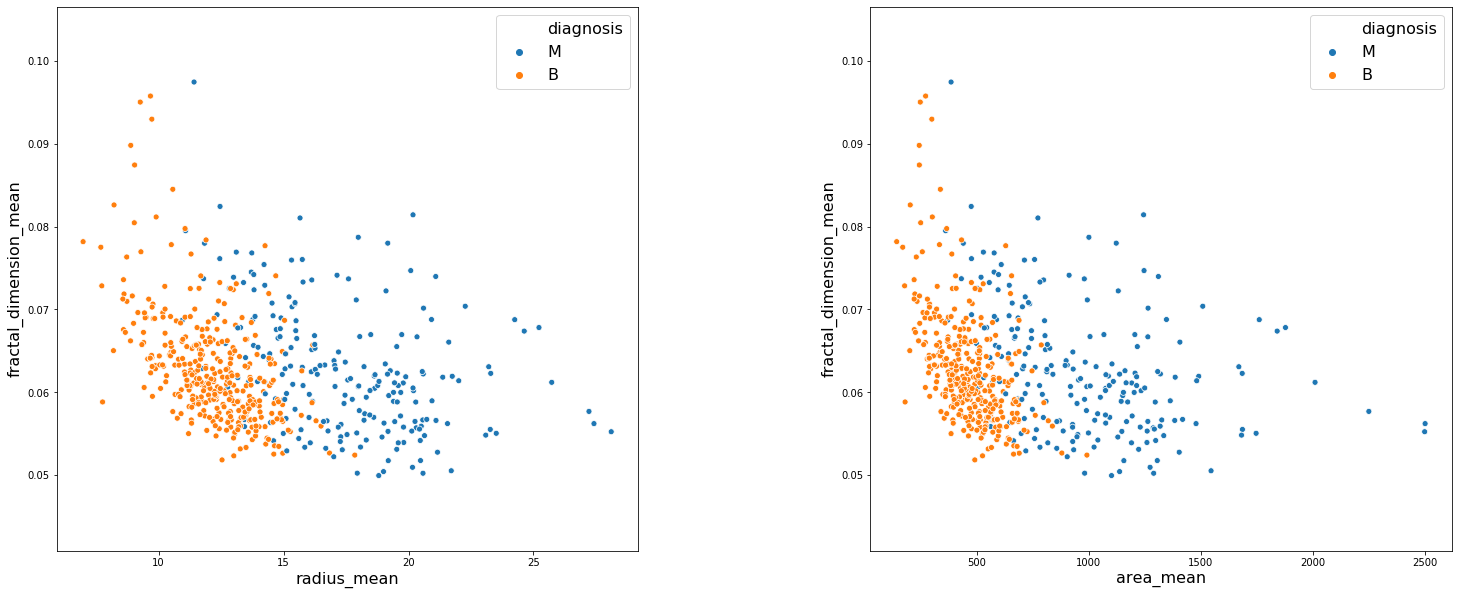

In [13]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(data["radius_mean"], data["fractal_dimension_mean"], hue=data["diagnosis"]);
ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(data["area_mean"], data["fractal_dimension_mean"], hue=data["diagnosis"]);

#### Low correlated pairs

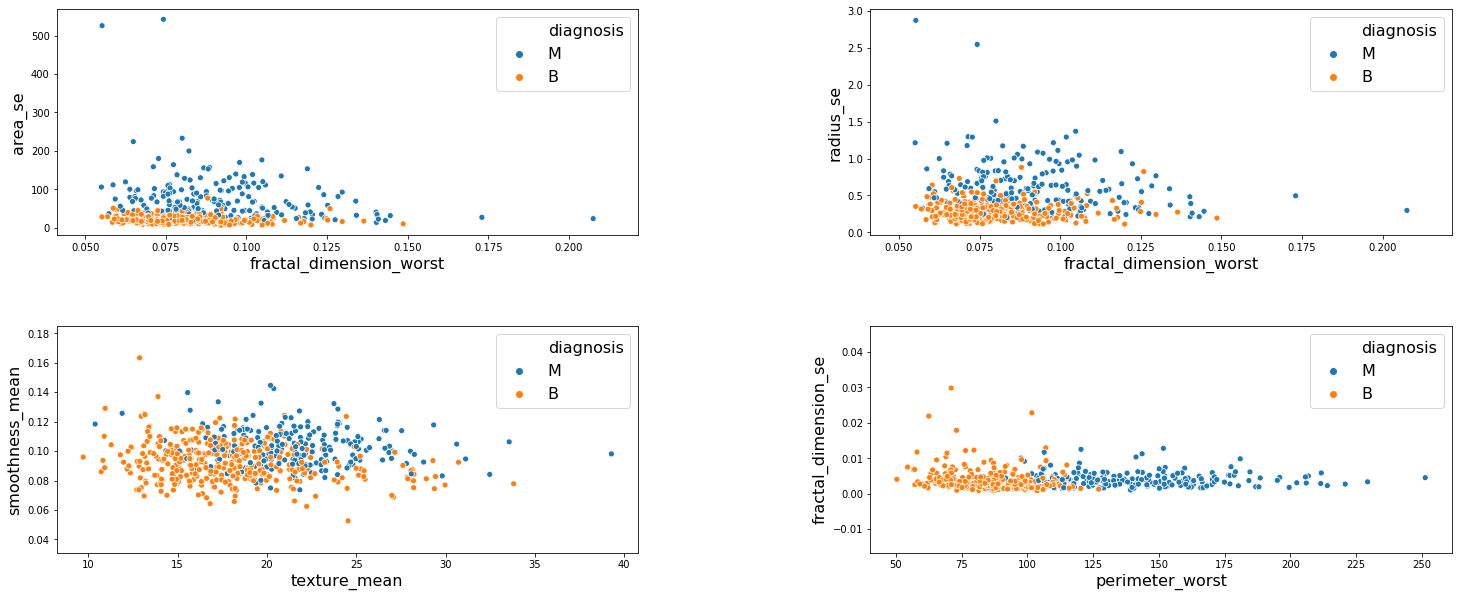

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data["fractal_dimension_worst"], data["area_se"], hue=data["diagnosis"]);
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(data["fractal_dimension_worst"], data["radius_se"], hue=data["diagnosis"]);
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(data["texture_mean"], data["smoothness_mean"], hue=data["diagnosis"]);
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(data["perimeter_worst"], data["fractal_dimension_se"], hue=data["diagnosis"]);

We can observe low correlated features that have in the same time a considerable overlap for the two `M` and `B` (i.e. fractal_dimension_worst and area_se) as well as low correlated features that have in the same time a good selectivity for `M` and `B` groups (i.e. `perimeter_worst` and `fractal_dimension_se`)

In [15]:
X = data.iloc[:, 1:]
y = data['diagnosis']

In [16]:
scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns.values.tolist())

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

## Principal Component Analysis (PCA)

In [17]:
total=0
varlist=[]
for i in np.arange(X_train.shape[1]):
    p=PCA(n_components=i+1)
    p.fit(X_train)
    total=total+p.explained_variance_ratio_[i]
    varlist.append(total)


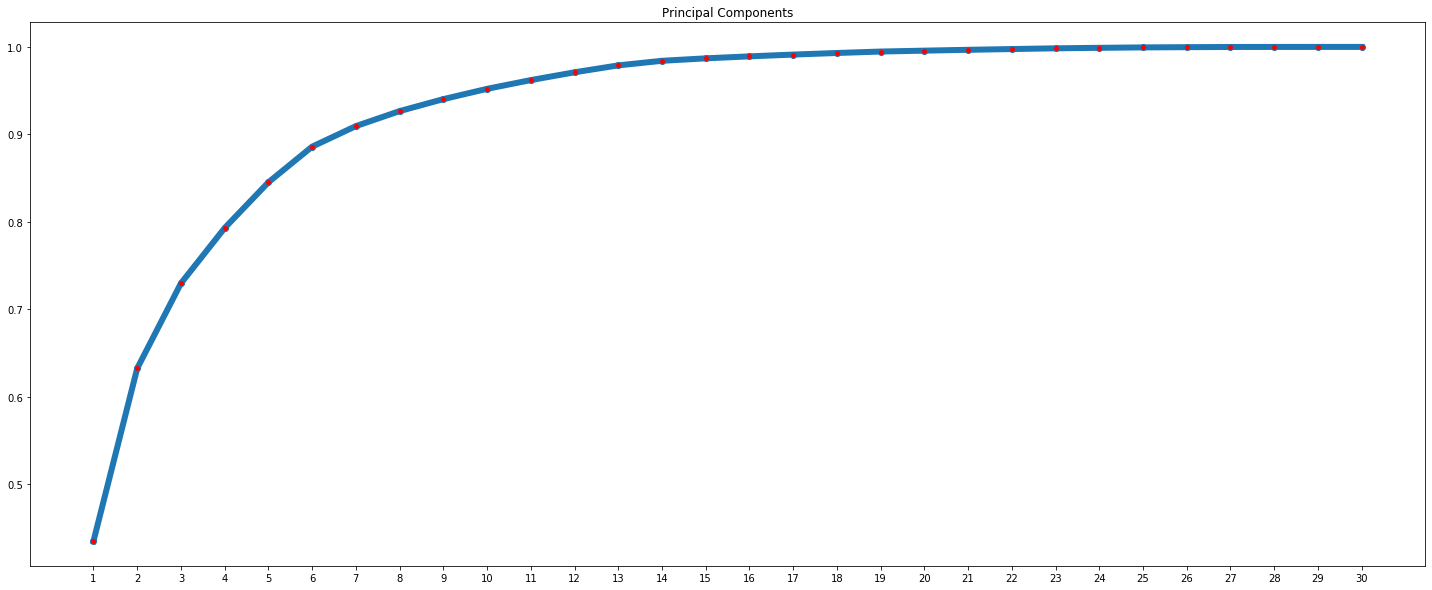

In [18]:
plt.plot(np.arange(1,X_train.shape[1]+1), varlist, marker='o', markerfacecolor='red', lw=6)
plt.xticks(np.arange(1,X_train.shape[1]+1));
plt.title("Principal Components");

We see that with 15 principal components, we get almost 100% of the variation.

In [19]:
pca = PCA(n_components=15)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 
                                      'principal component 2', 
                                      'principal component 3', 
                                      'principal component 4', 
                                      'principal component 5', 
                                      'principal component 6', 
                                      'principal component 7', 
                                      'principal component 8', 
                                      'principal component 9', 
                                      'principal component 10', 
                                      'principal component 11', 
                                      'principal component 12', 
                                      'principal component 13', 
                                      'principal component 14', 
                                      'principal component 15'])
finalDf = pd.concat([principalDf, data[['diagnosis']]], axis = 1)

In [20]:
X, y = finalDf.iloc[:, :15], finalDf['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Classification Models

### Logistic Regression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.965034965034965


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neighbors

In [24]:
scores = []
for i in range(1,51):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

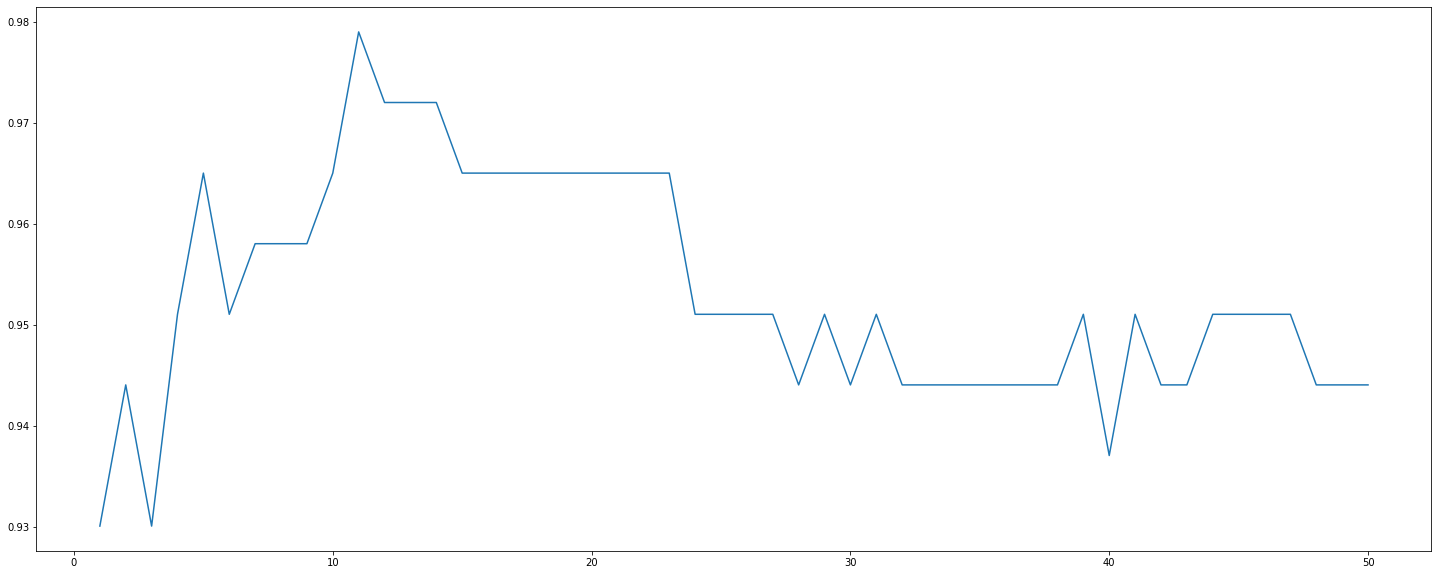

In [25]:
plt.plot(range(1,51), scores)

In [26]:
knn = KNeighborsClassifier(n_neighbors=11)

In [27]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9790209790209791

Here, we see that using KNN with 11 neighbors gives us the best performance, with an accuracy of about 98%.

### Linear Discriminant Analysis

In [28]:
lda = LinearDiscriminantAnalysis()

In [29]:
lda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.958041958041958

### Quadratic Discriminant Analysis

In [30]:
qda = QuadraticDiscriminantAnalysis()

In [31]:
qda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.958041958041958

### Random Forest

In [32]:
rf_scores = []
for i in range(1,101):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))

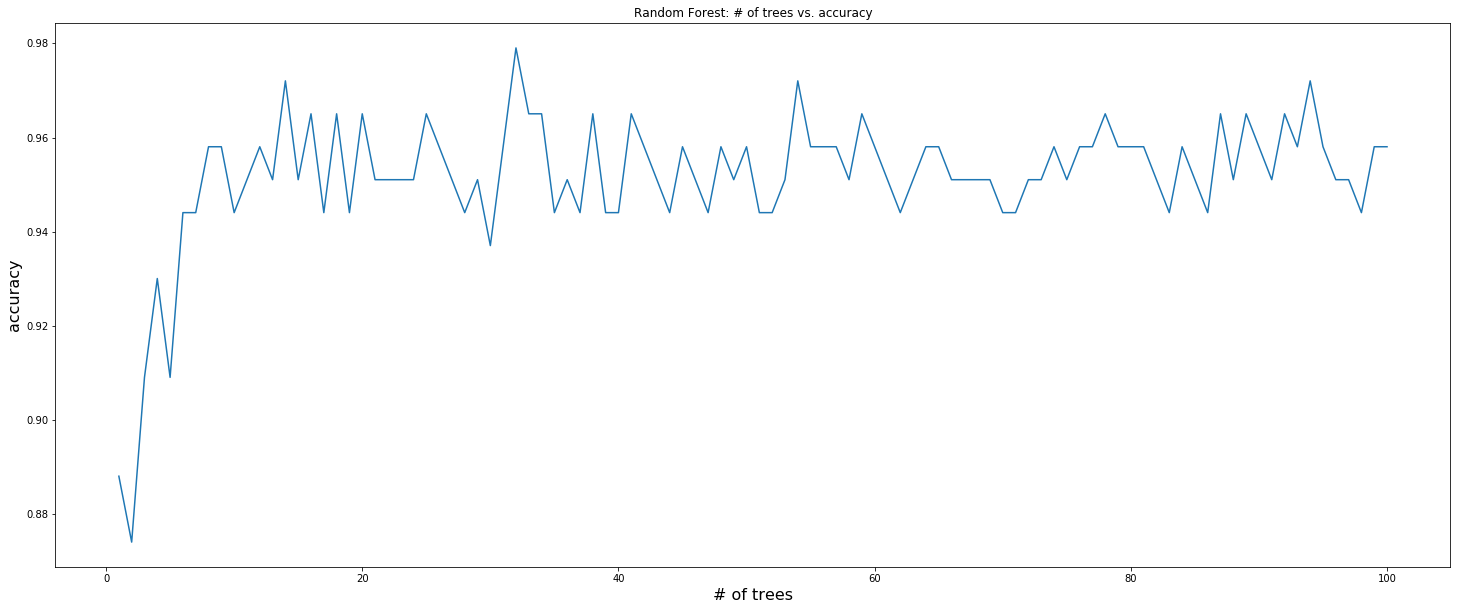

In [33]:
plt.plot(np.arange(1,101), rf_scores);
plt.xlabel("# of trees");
plt.ylabel("accuracy");
# plt.xticks(np.arange(1,501))
plt.title("Random Forest: # of trees vs. accuracy");

In [34]:
rf = RandomForestClassifier(65)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
rf.score(X_test, y_test)

0.9440559440559441

We see that 15 trees is optimal for getting the heighest accuracy (97%) from and random forest .

### Variable Importance

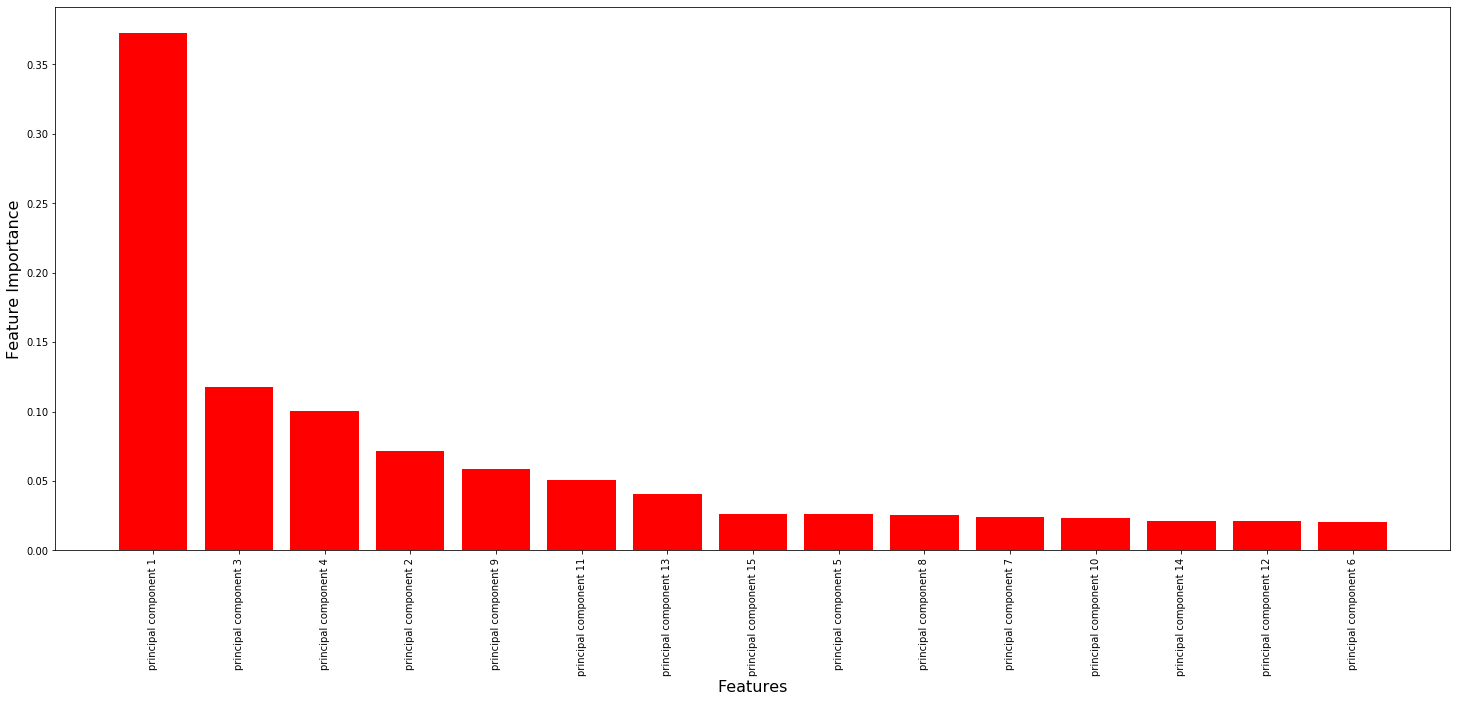

In [35]:
feature_importances = pd.DataFrame(rf.feature_importances_ ,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.bar(feature_importances.index, feature_importances.importance, color = "red");
plt.xlabel("Features");
plt.xticks(rotation=90);
plt.ylabel("Feature Importance");

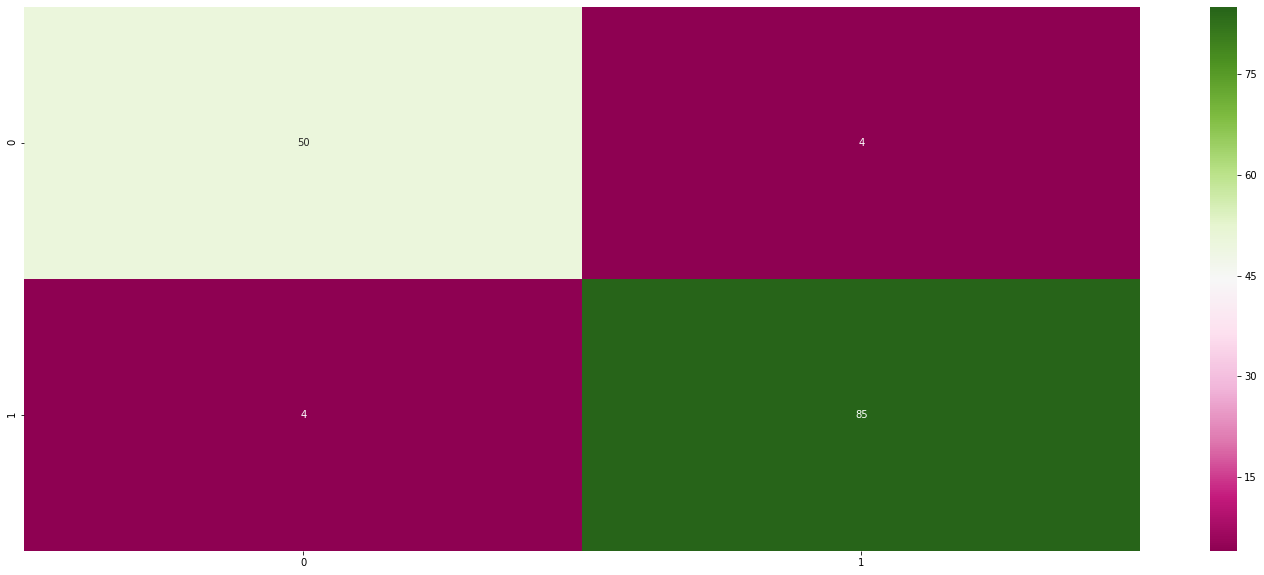

In [36]:
cm = confusion_matrix(y_test, predictions, labels=["M", "B"])
sns.heatmap(cm, annot=True, cmap="PiYG");

Let’s try to run Random Forest model with a reduced number of features, including in the features list for training only the ones with the highest importance

In [37]:
feature_lst = np.array(feature_importances.reset_index()['index'][:22])

In [38]:
X_train_fl = X_train.loc[:, feature_lst]
X_test_fl = X_test.loc[:, feature_lst]

In [39]:
rf = RandomForestClassifier(500)
rf.fit(X_train_fl, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

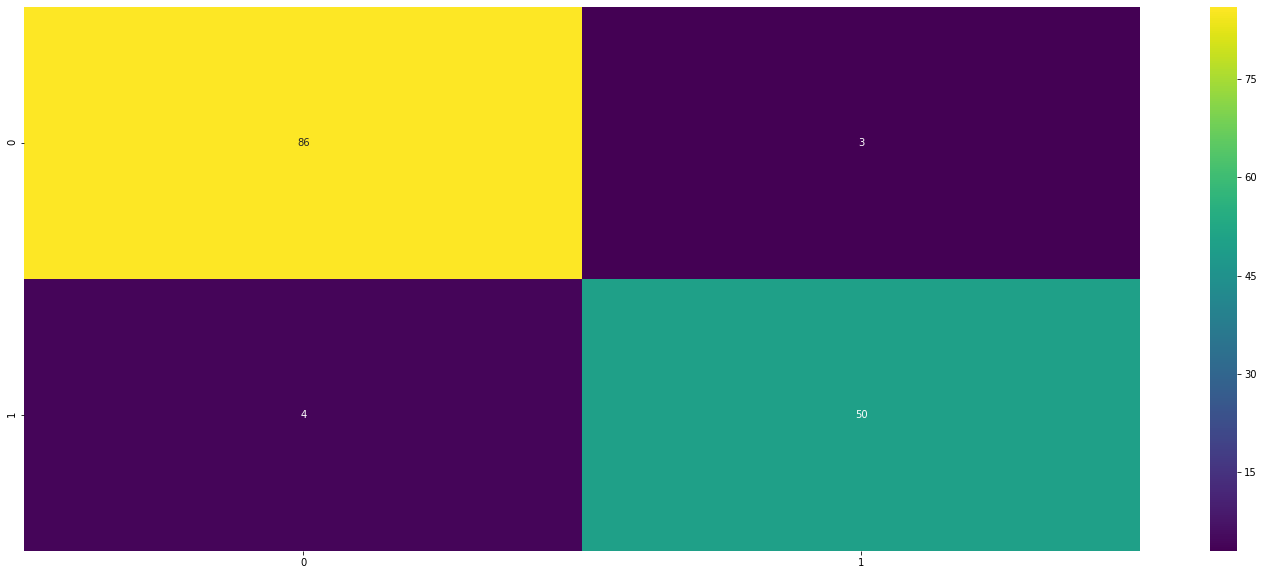

In [40]:
predictions_fl = rf.predict(X_test_fl)
cm = confusion_matrix(y_test, predictions_fl)
sns.heatmap(cm, annot=True, cmap="viridis");

In [41]:
rf.score(X_test_fl, y_test)

0.951048951048951

It appears that reducing the number of features from 33 to the most important 22 did not enhance the performance of the random forest, as we get the same confusion matrix and accuracy